In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

# Word Language Model

In [37]:
log_dir = "./word_language_model/log"
image_dir = "./word_language_model/image"

In [50]:
def load_logs(name):
    train_path = log_dir + '/' + name + '_train'
    test_path = log_dir + '/' + name + '_test'
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path).T[0].to_dict()
    return {
        'train': train, 
        'test': test
    }

def plot_train_test_loss(train_log, title, filename):
    f, ax = plt.subplots(1, 1, figsize=(8, 5))
    plt.plot(train_log['train_loss'][1:], label='train')
    plt.plot(train_log['val_loss'][1:], label='valid')
    plt.legend()
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('negative log likelihood')
    plt.savefig(image_dir + '/' + filename)
    
def plot_compare_epoch(train_logs, labels, column, ylabel, title, filename):
    f, ax = plt.subplots(1, 1, figsize=(8, 5))
    for log, lbl in zip(train_logs, labels):
        plt.plot(log[column][1:], label=lbl)
    plt.legend()
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel(ylabel)
    plt.savefig(image_dir + '/' + filename)
    
def plot_compare_bar(df, ylabel, title, filename):
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax = df.plot(kind='bar', ax=ax)
    plt.ylabel(ylabel)
    max_df = max(df.max())
    min_df = min(df.min())
    x_extra = (max_df - min_df) * 0.2
    ax.set_ylim(
        (max(0, min_df - x_extra), max_df + x_extra)
    )
    for p in ax.patches:
        ax.annotate(
            "{:.5f}".format(p.get_height()), 
            (p.get_x() + p.get_width() / 2, p.get_height() + x_extra / 10), 
            ha='center'
        )
    plt.title(title)
    plt.tight_layout()
    plt.xticks(rotation=0)
    ax.legend(loc='best')
    plt.savefig(image_dir + '/' + filename)

In [39]:
fnn_no_tie = {
    'adam': load_logs('fnn_no_tie_adam'),
    'sgd': load_logs('fnn_no_tie_sgd'),
    'rmsprop': load_logs('fnn_no_tie_rmsprop'),
}
fnn_tie = {
    'adam': load_logs('fnn_tie_adam'),
    'sgd': load_logs('fnn_tie_sgd'),
    'rmsprop': load_logs('fnn_tie_rmsprop'),
}
gru = load_logs('gru_adam')
lstm = load_logs('lstm_adam')
transformer = load_logs('transformer_adam')

### FNN

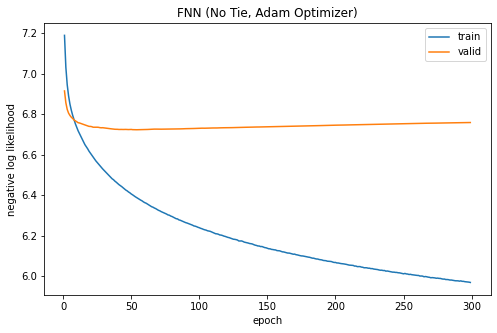

In [5]:
plot_train_test_loss(fnn_no_tie['adam']['train'], 'FNN (No Tie, Adam Optimizer)', 'fnn_no_tie_adam_loss_epoch.png')

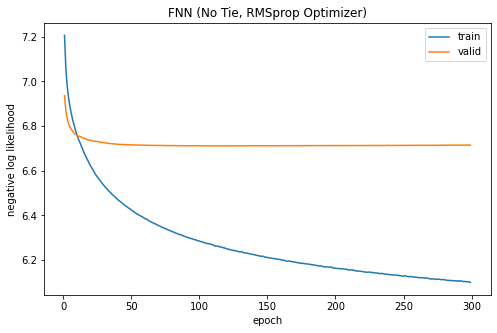

In [6]:
plot_train_test_loss(fnn_no_tie['rmsprop']['train'], 'FNN (No Tie, RMSprop Optimizer)', 'fnn_no_tie_rmsprop_loss_epoch.png')

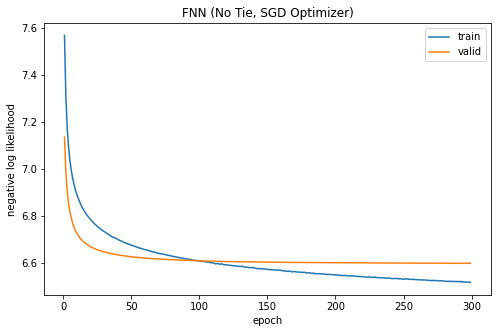

In [7]:
plot_train_test_loss(fnn_no_tie['sgd']['train'], 'FNN (No Tie, SGD Optimizer)', 'fnn_no_tie_sgd_loss_epoch.png')

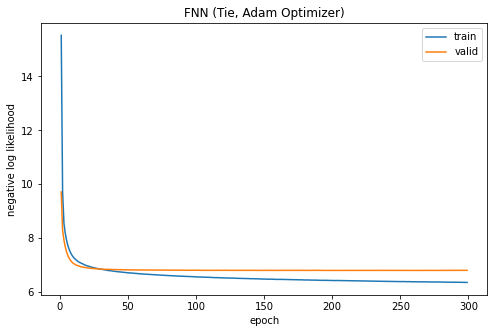

In [8]:
plot_train_test_loss(fnn_tie['adam']['train'], 'FNN (Tie, Adam Optimizer)', 'fnn_tie_adam_loss_epoch.png')

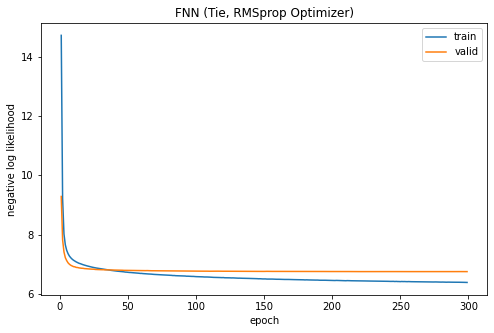

In [9]:
plot_train_test_loss(fnn_tie['rmsprop']['train'], 'FNN (Tie, RMSprop Optimizer)', 'fnn_tie_rmsprop_loss_epoch.png')

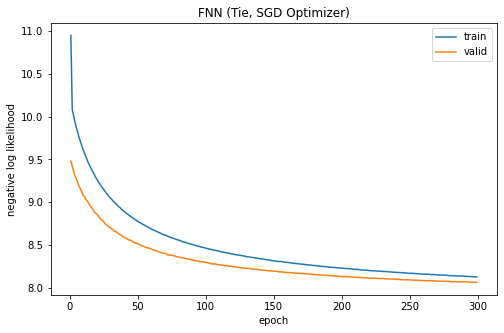

In [10]:
plot_train_test_loss(fnn_tie['sgd']['train'], 'FNN (Tie, SGD Optimizer)', 'fnn_tie_sgd_loss_epoch.png')

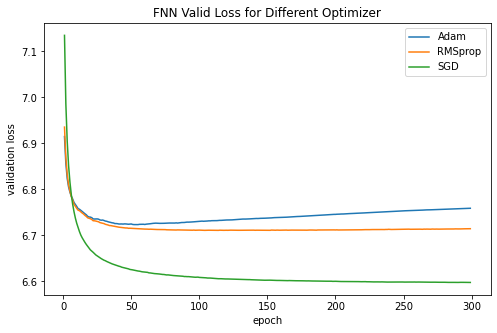

In [11]:
logs = [fnn_no_tie['adam']['train'], fnn_no_tie['rmsprop']['train'], fnn_no_tie['sgd']['train']]
labels = ['Adam', 'RMSprop', 'SGD']
plot_compare_epoch(logs, labels, 'val_loss', 'validation loss', 'FNN Valid Loss for Different Optimizer', 'fnn_optimizer_loss_epoch.png')

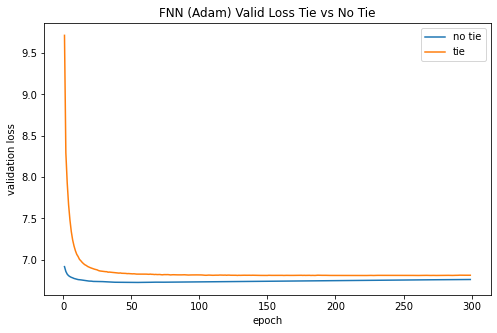

In [12]:
logs = [fnn_no_tie['adam']['train'], fnn_tie['adam']['train']]
labels = ['no tie', 'tie']
plot_compare_epoch(logs, labels, 'val_loss', 'validation loss', 'FNN (Adam) Valid Loss Tie vs No Tie', 'fnn_adam_tie_no_tie_loss_epoch.png')

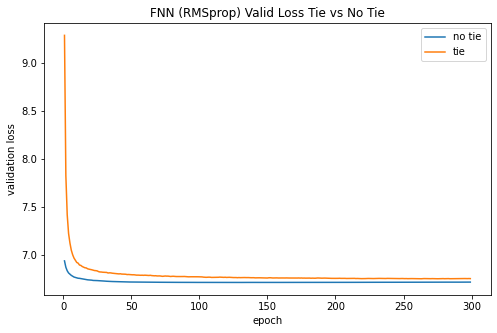

In [13]:
logs = [fnn_no_tie['rmsprop']['train'], fnn_tie['rmsprop']['train']]
labels = ['no tie', 'tie']
plot_compare_epoch(logs, labels, 'val_loss', 'validation loss', 'FNN (RMSprop) Valid Loss Tie vs No Tie', 'fnn_rmsprop_tie_no_tie_loss_epoch.png')

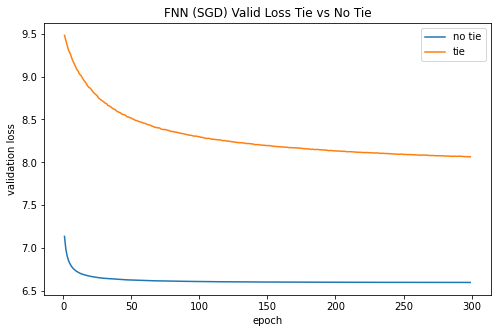

In [14]:
logs = [fnn_no_tie['sgd']['train'], fnn_tie['sgd']['train']]
labels = ['no tie', 'tie']
plot_compare_epoch(logs, labels, 'val_loss', 'validation loss', 'FNN (SGD) Valid Loss Tie vs No Tie', 'fnn_sgd_tie_no_tie_loss_epoch.png')

In [46]:
test_loss = pd.DataFrame({
    'no tie': {
        'Adam': fnn_no_tie['adam']['test']['test_loss'],
        'RMSprop': fnn_no_tie['rmsprop']['test']['test_loss'],
        'SGD': fnn_no_tie['sgd']['test']['test_loss'],
    },
    'tie': {
        'Adam': fnn_tie['adam']['test']['test_loss'],
        'RMSprop': fnn_tie['rmsprop']['test']['test_loss'],
        'SGD': fnn_tie['sgd']['test']['test_loss'],
    },
})
test_loss

,no tie,tie
Adam,6.688355,6.775525
RMSprop,6.681635,6.721990
SGD,6.573455,8.057903


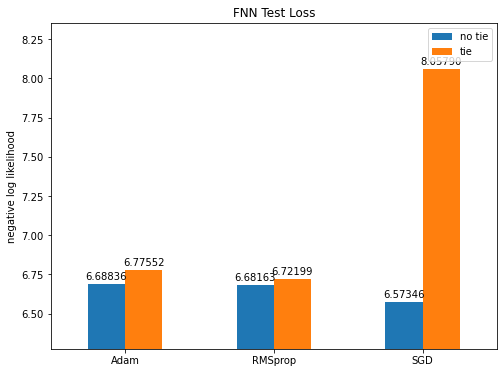

In [51]:
plot_compare_bar(test_loss, 'negative log likelihood', 'FNN Test Loss', 'fnn_test_loss.png')

### LSTM, GRU, Transformer

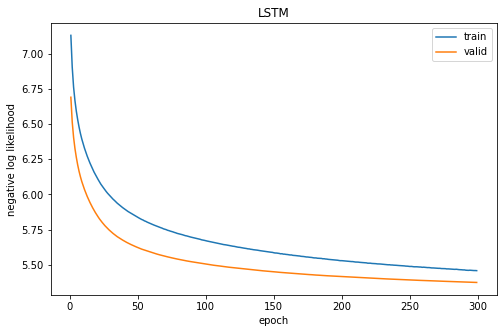

In [26]:
plot_train_test_loss(lstm['train'], 'LSTM', 'lstm_loss_epoch.png')

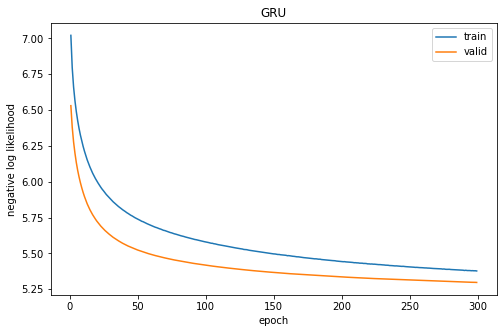

In [27]:
plot_train_test_loss(gru['train'], 'GRU', 'gru_loss_epoch.png')

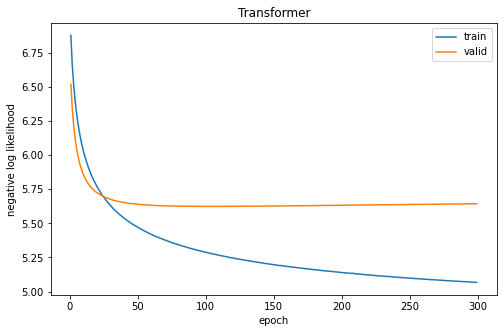

In [28]:
plot_train_test_loss(transformer['train'], 'Transformer', 'transformer_loss_epoch.png')

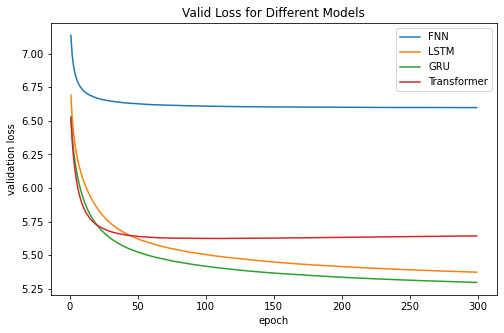

In [29]:
logs = [fnn_no_tie['sgd']['train'], lstm['train'], gru['train'], transformer['train']]
labels = ['FNN', 'LSTM', 'GRU', 'Transformer']
plot_compare_epoch(logs, labels, 'val_loss', 'validation loss', 'Valid Loss for Different Models', 'model_loss_epoch.png')

In [30]:
test_loss = pd.DataFrame({
    'test_loss': {
        'FNN': fnn_no_tie['sgd']['test']['test_loss'],
        'LSTM': lstm['test']['test_loss'],
        'GRU': gru['test']['test_loss'],
        'Transformer': transformer['test']['test_loss']
    }
})
test_loss

,test_loss
FNN,6.573455
GRU,5.221312
LSTM,5.297781
Transformer,5.538206


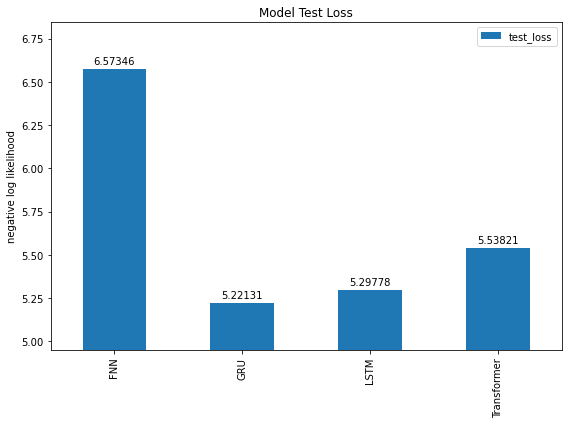

In [33]:
plot_compare_bar(test_loss, 'negative log likelihood', 'Model Test Loss', 'model_test_loss.png')

# NER Tagging

In [2]:
log_dir = "./ner_tagging/logs"
image_dir = "./ner_tagging/images"

In [35]:
def load_logs(name):
    train_path = log_dir + '/' + name + '_train'
    test_path = log_dir + '/' + name + '_eval'
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    return {
        'train': train, 
        'test': test
    }

def plot_f1_epoch(train_log, title, filename):
    f, ax = plt.subplots(1, 1, figsize=(8, 5))
    plt.plot(train_log['train'][1:], label='train')
    plt.plot(train_log['dev'][1:], label='valid')
    plt.plot(train_log['test'][1:], label='test')
    plt.legend()
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('F1 score')
    plt.savefig(image_dir + '/' + filename)
    
def plot_compare_epoch(train_logs, labels, column, title, filename):
    f, ax = plt.subplots(1, 1, figsize=(8, 5))
    for log, lbl in zip(train_logs, labels):
        plt.plot(log[column][1:], label=lbl)
    plt.legend()
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('F1 score')
    plt.savefig(image_dir + '/' + filename)
    
def plot_compare_bar(df, title, filename):
    f, ax = plt.subplots(1, 1, figsize=(16, 7))
    df.plot(kind='bar', ax=ax, width=0.95)
    plt.ylabel('F1 score', fontsize=12)
    max_df = max(df.max())
    min_df = min(df.min())
    x_extra = (max_df - min_df) * 0.2
    ax.set_ylim(
        (max(0, min_df - x_extra), max_df + x_extra)
    )
    for p in ax.patches:
        ax.annotate(
            "{:.5f}".format(p.get_height()), 
            (p.get_x() + p.get_width() / 2, p.get_height() + x_extra / 10), 
            ha='center',
            fontsize=12
        )
    plt.title(title, fontsize=15)
    plt.xticks(fontsize=12, rotation=0, ha='center')
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(image_dir + '/' + filename)

In [4]:
cnn = {
    1: load_logs('model_1_cnn'),
    2: load_logs('model_2_cnn'),
    3: load_logs('model_3_cnn'),
    4: load_logs('model_4_cnn'),
    5: load_logs('model_5_cnn'),
}
lstm = load_logs('model_lstm')

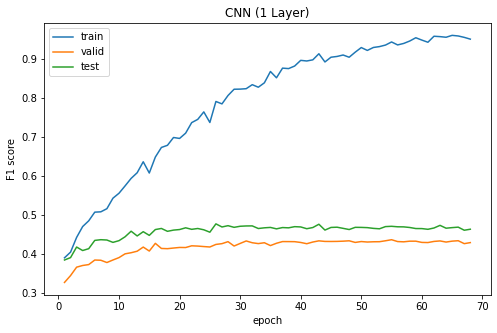

In [5]:
plot_f1_epoch(cnn[1]['test'], 'CNN (1 Layer)', 'cnn_1_epoch.png')

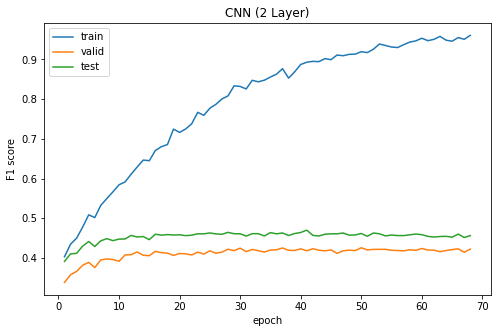

In [6]:
plot_f1_epoch(cnn[2]['test'], 'CNN (2 Layer)', 'cnn_2_epoch.png')

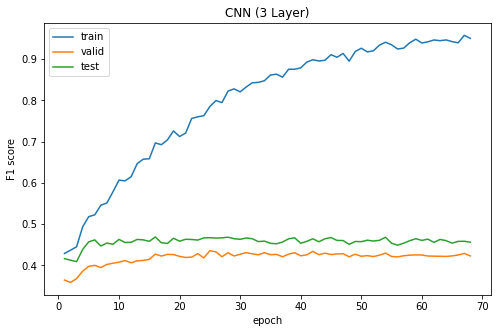

In [7]:
plot_f1_epoch(cnn[3]['test'], 'CNN (3 Layer)', 'cnn_3_epoch.png')

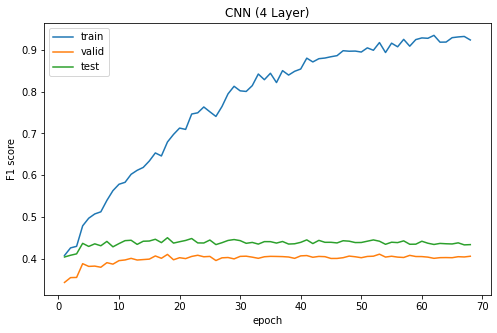

In [8]:
plot_f1_epoch(cnn[4]['test'], 'CNN (4 Layer)', 'cnn_4_epoch.png')

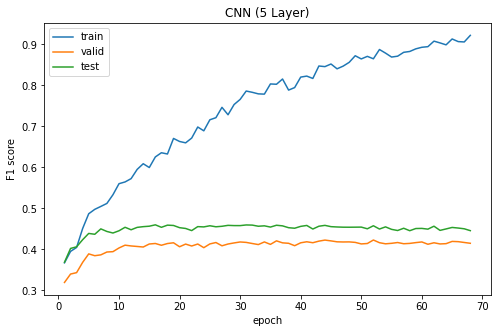

In [9]:
plot_f1_epoch(cnn[5]['test'], 'CNN (5 Layer)', 'cnn_5_epoch.png')

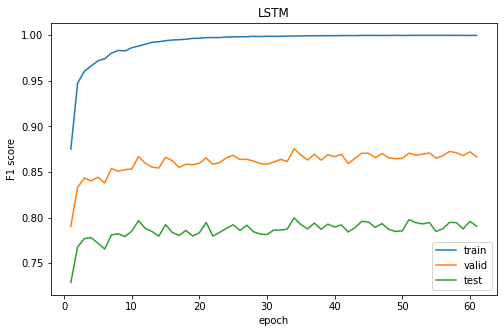

In [10]:
plot_f1_epoch(lstm['test'], 'LSTM', 'lstm_epoch.png')

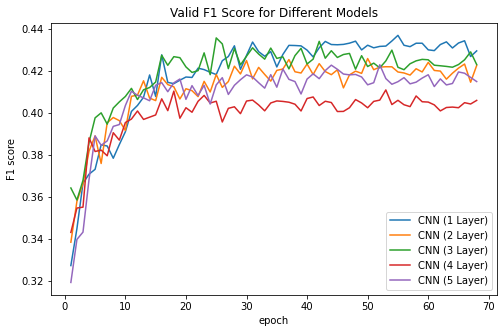

In [13]:
logs = [cnn[1]['test'], cnn[2]['test'], cnn[3]['test'], cnn[4]['test'], cnn[5]['test']]
labels = ['CNN (1 Layer)', 'CNN (2 Layer)', 'CNN (3 Layer)', 'CNN (4 Layer)', 'CNN (5 Layer)']
plot_compare_epoch(logs, labels, 'dev', 'Valid F1 Score for Different Models', 'model_valid_f1_epoch.png')

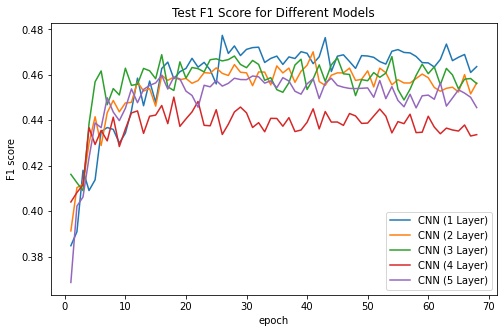

In [14]:
logs = [cnn[1]['test'], cnn[2]['test'], cnn[3]['test'], cnn[4]['test'], cnn[5]['test']]
labels = ['CNN (1 Layer)', 'CNN (2 Layer)', 'CNN (3 Layer)', 'CNN (4 Layer)', 'CNN (5 Layer)']
plot_compare_epoch(logs, labels, 'test', 'Test F1 Score for Different Models', 'model_test_f1_epoch.png')

In [15]:
test_loss = pd.DataFrame({
    'train': {
        'CNN (1 Layer)': cnn[1]['test']['train'].max(),
        'CNN (2 Layer)': cnn[2]['test']['train'].max(),
        'CNN (3 Layer)': cnn[3]['test']['train'].max(),
        'CNN (4 Layer)': cnn[4]['test']['train'].max(),
        'CNN (5 Layer)': cnn[5]['test']['train'].max(),
        'LSTM': lstm['test']['train'].max(),
    },
    'valid': {
        'CNN (1 Layer)': cnn[1]['test']['dev'].max(),
        'CNN (2 Layer)': cnn[2]['test']['dev'].max(),
        'CNN (3 Layer)': cnn[3]['test']['dev'].max(),
        'CNN (4 Layer)': cnn[4]['test']['dev'].max(),
        'CNN (5 Layer)': cnn[5]['test']['dev'].max(),
        'LSTM': lstm['test']['dev'].max(),
    },
    'test': {
        'CNN (1 Layer)': cnn[1]['test']['test'].max(),
        'CNN (2 Layer)': cnn[2]['test']['test'].max(),
        'CNN (3 Layer)': cnn[3]['test']['test'].max(),
        'CNN (4 Layer)': cnn[4]['test']['test'].max(),
        'CNN (5 Layer)': cnn[5]['test']['test'].max(),
        'LSTM': lstm['test']['test'].max(),
    },
})
test_loss

,train,valid,test
CNN (1 Layer),0.960270,0.436748,0.477380
CNN (2 Layer),0.960779,0.425721,0.470140
CNN (3 Layer),0.958077,0.435529,0.468868
CNN (4 Layer),0.934963,0.410802,0.450209
CNN (5 Layer),0.921897,0.422752,0.459786
LSTM,0.999681,0.875568,0.799754


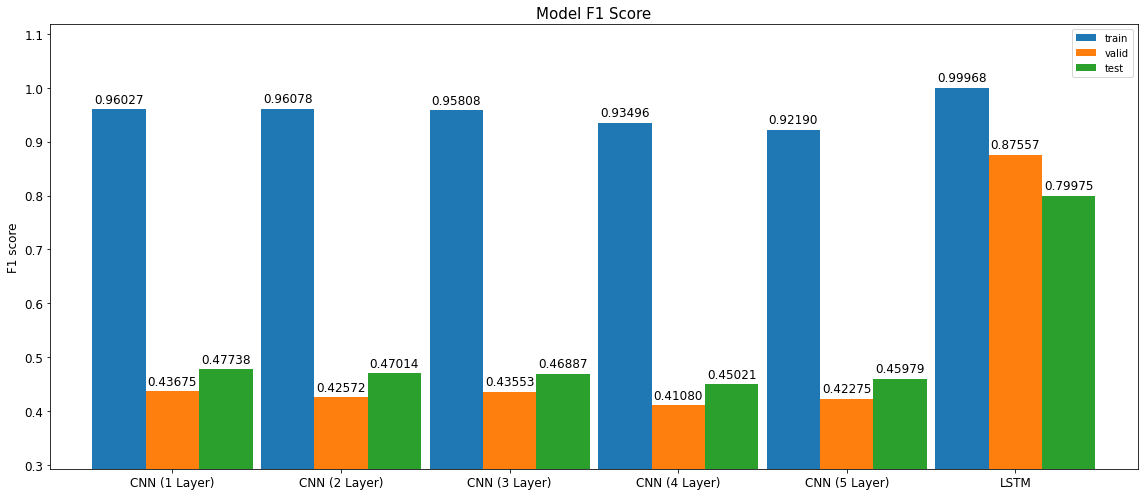

In [36]:
plot_compare_bar(test_loss, 'Model F1 Score', 'model_f1_score.png')